# Importing Data

The dataset used in this project is included as `student-data.csv`. This dataset has the following attributes:

- `school` : student's school (binary: "GP" or "MS")
- `sex` : student's sex (binary: "F" - female or "M" - male)
- `age` : student's age (numeric: from 15 to 22)
- `address` : student's home address type (binary: "U" - urban or "R" - rural)
- `famsize` : family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- `Pstatus` : parent's cohabitation status (binary: "T" - living together or "A" - apart)
- `Medu` : mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Fedu` : father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- `Mjob` : mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `Fjob` : father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- `reason` : reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- `guardian` : student's guardian (nominal: "mother", "father" or "other")
- `traveltime` : home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- `studytime` : weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- `failures` : number of past class failures (numeric: n if 1<=n<3, else 4)
- `schoolsup` : extra educational support (binary: yes or no)
- `famsup` : family educational support (binary: yes or no)
- `paid` : extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- `activities` : extra-curricular activities (binary: yes or no)
- `nursery` : attended nursery school (binary: yes or no)
- `higher` : wants to take higher education (binary: yes or no)
- `internet` : Internet access at home (binary: yes or no)
- `romantic` : with a romantic relationship (binary: yes or no)
- `famrel` : quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- `freetime` : free time after school (numeric: from 1 - very low to 5 - very high)
- `goout` : going out with friends (numeric: from 1 - very low to 5 - very high)
- `Dalc` : workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `Walc` : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- `health` : current health status (numeric: from 1 - very bad to 5 - very good)
- `absences` : number of school absences (numeric: from 0 to 93)
- `passed` : did the student pass the final exam (binary: yes or no)



In [4]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
from time import time

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


# Data Exploration

In [5]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]

# TODO: Calculate passing students
n_passed = sum(student_data['passed'] == 'yes')

# TODO: Calculate failing students
n_failed = sum(student_data['passed'] == 'no')

# TODO: Calculate graduation rate
grad_rate = n_passed / float(n_students) * 100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preprocess features, Extract Labels

In [6]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
features = student_data[feature_cols]
labels = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
display(features.head())

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [7]:

def numerical_transform_features(features):
    # Convert 'yes' and 'no' to numerical values 0 and 1
    nominal_cols = features.columns[features.dtypes == 'object']
    for col in nominal_cols:
        features[col] = features[col].replace(to_replace={'yes':0, 'no':1})
    
    # Create dummy variables for categorical features like school, famsize, Pstatus, 
    #  Mjob, Fjob, gaurdian, reason etc. 
    # Assuming all categorical featyres are nominal
    nominal_cols = features.columns[features.dtypes == 'object']
    features = pd.get_dummies(features, prefix=nominal_cols)
    return features


# Split Data: 

Steps to take:

1. Convert the features to numerical features
2. Create Training and Testing set, so that model can be tested on test set.
3. Create Folds of Training set for cross-validation and hyperparameter optimization. 


In [8]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Set the number of training points
num_train = 300

# Convert features to numerical data
features_all = numerical_transform_features(features)
labels_all = labels.replace({'yes':0, 'no':1})

# stratify to avoid having very few examples of failure class in training data. 
features_train, features_test, labels_train, labels_test = train_test_split(features_all, labels_all,\
                                                train_size=num_train,\
                                                stratify=labels_all, random_state=42)

# Folds for cross-validation 
skf = StratifiedKFold(n_splits=10)
cv_folds = skf.split(features_train, labels_train)

# Show the results of the split
print "Training set has {} samples.".format(features_train.shape[0])
print "Testing set has {} samples.".format(features_test.shape[0])
print "Training set has {} % of failed students".format(100 * float(sum(labels_train))/labels_train.shape[0])
print "Testing set has {} % of failed students".format(100 * float(sum(labels_test))/labels_test.shape[0])

/Users/Shelley/env/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Training set has 300 samples.
Testing set has 95 samples.
Training set has 33.0 % of failed students
Testing set has 32.6315789474 % of failed students


# Model Evalutation Metrics
Framework for evaluating model performance


In [9]:
class classifier(object):
    def __init__(self, clf, error_metric=None):
        self.clf = clf
        self.train_time = np.Inf # to indicate its not trained yet
        self.predtrain_time = np.Inf # prediction time on testing data
        self.predtest_time = np.Inf
        self.test_score = 0
        self.train_score = 0
        self.error_metric = error_metric
        
    def train(self,features_train, labels_train):
        start = time()
        self.clf.fit(features_train,labels_train)
        self.train_time = time() - start
        return
    
    def predict(self,features_train=pd.DataFrame,features_test=pd.DataFrame):
        predictions = []    
        if not features_train.empty:
            # Make Predictions
            start = time()
            labels_train_pred = self.clf.predict(features_train)
            self.predtrain_time = time()-start
            predictions.append(labels_train_pred)
           
        if not features_test.empty:
            # Make Predictions
            start = time()
            labels_test_pred = self.clf.predict(features_test)
            self.predtest_time = time()-start
            predictions.append(labels_test_pred)
           
        return predictions
  
    def get_error(self, features, labels, test=True):
        if test:
            labels_train_pred = self.predict(features_train=pd.DataFrame(),\
                                           features_test=features)[0]
            self.test_score = self.error_metric(labels_train_pred, labels)
            return self.test_score
        else:
            labels_test_pred = self.predict(features_train=features)[0]
            self.train_score = self.error_metric(labels_test_pred, labels)
            return self.train_score
    
    def get_report(self, metric="F1"):
        print("Time spent in training: {:.4f} secs".format(self.train_time))
        print("Time spent in predictions for training set: {:.4f} secs".format(self.predtrain_time))
        print("Time spent in predictions for test set: {:.4f} secs".format(self.predtest_time))
        print("{} score for training set: {:.4f}".format(metric, self.train_score))
        print("{} score for testing set: {:.4f}".format(metric, self.test_score))
    
    def draw_boundaries(self):
        return
    
    def draw_roc_curve(self):
        return
    
    def draw_prob_hist(self):
        return
        
              
    


In [28]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# hyperparameter to optomize : n_neighbhors, weights, metric=Manhattan, KDtree or balltree??
clf_knn = KNeighborsClassifier(n_neighbors=6,\
                                weights='distance',\
                                metric="hamming")
clf_knn = classifier(clf_knn, accuracy_score)
clf_knn.train(features_train, labels_train)
predictions = clf_knn.predict(features_train, features_test)
clf_knn.get_error(features_train, labels_train, test=False)
clf_knn.get_error(features_test, labels_test)
clf_knn.get_report(metric="Accuracy")
print(confusion_matrix(predictions[1],labels_test))

Time spent in training: 0.0008 secs
Time spent in predictions for training set: 0.0035 secs
Time spent in predictions for test set: 0.0017 secs
Accuracy score for training set: 1.0000
Accuracy score for testing set: 0.6737
[[54 21]
 [10 10]]


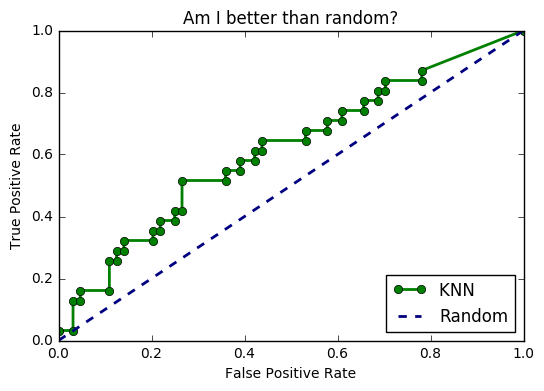

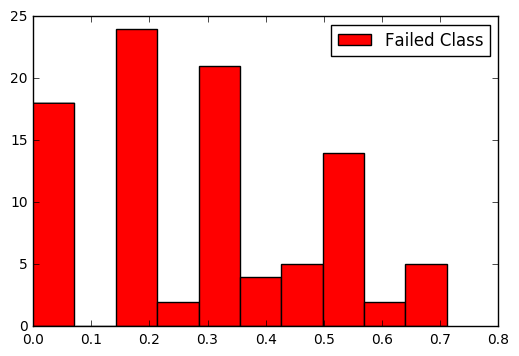

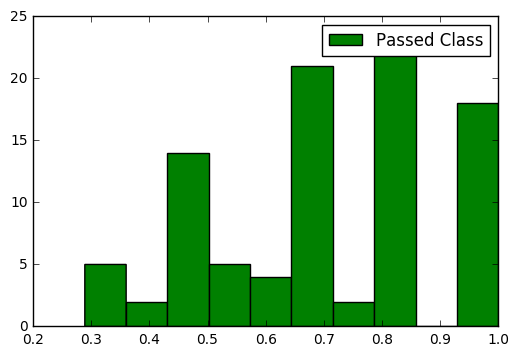

In [42]:
## ROC curve
y_prob_test = clf_knn.clf.predict_proba(features_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(labels_test, y_prob_test[:,1])
auc = auc(fpr, tpr)
from  matplotlib import pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot(fpr,tpr,color='g',lw=2, marker='o',label='KNN ')
plt.plot([0,1],[0,1],color='navy',lw=2,ls="--", label='Random')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Am I better than random?')
plt.legend(loc="lower right")
plt.hold(True)
plt.figure(2)
plt.hist(y_prob_test[:,1],color='red', label="Failed Class")
plt.legend(loc=0)
plt.figure(3)
plt.hist(y_prob_test[:,0],color='green', label="Passed Class")
plt.legend(loc=1)

Time spent in training: 0.0139 secs
Time spent in predictions for training set: 0.0030 secs
Time spent in predictions for test set: 0.0030 secs
Recall score for training set: 0.8000
Recall score for testing set: 0.8333


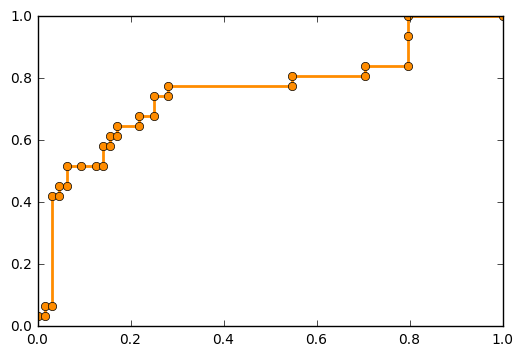

0.762096774194


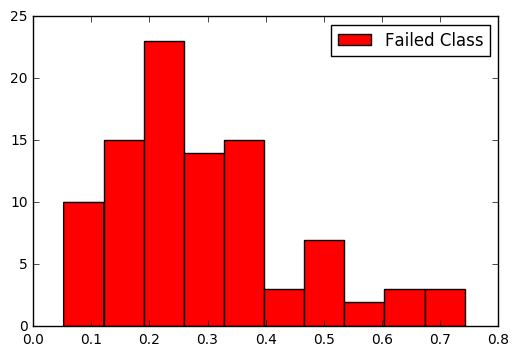

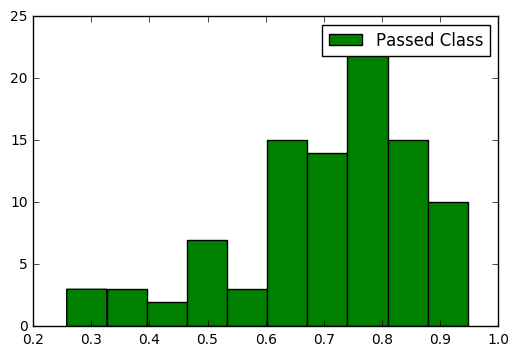

In [80]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# hyperparameters: n_estimators, max_features, max_depth
clf_rf = RandomForestClassifier(n_estimators=5, \
                                criterion='entropy',\
                                max_features="sqrt", max_depth=5, min_samples_split=4, random_state=42)
                               #class_weight="balanced")
clf_rf = classifier(clf_rf, recall_score)
clf_rf.train(features_train, labels_train)
predictions = clf_rf.predict(features_train, features_test)
clf_rf.get_error(features_train, labels_train, test=False)
clf_rf.get_error(features_test, labels_test)
clf_rf.get_report(metric="Recall")


## ROC curve
y_prob_test = clf_rf.clf.predict_proba(features_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(labels_test, y_prob_test[:,1])
auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',lw=2, marker='o',label='Random Forest ')
plt.show()

plt.figure(2)
plt.hist(y_prob_test[:,1],color='red', label="Failed Class")
plt.legend(loc=0)
plt.figure(3)
plt.hist(y_prob_test[:,0],color='green', label="Passed Class")
plt.legend(loc=1)
print(auc)

| Classifier        | Training Time(sec) | Prediction Time (test) | F1 Score (train) | F1 Score (test) | Recall(Test)|Accuracy(Test)
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| **KNN**           | **0.0008** | **0.0018**| **1.00**| 0.3922 |0.5|0.6737
| **Random Forest** | 0.0160|0.0033|0.4604|**0.4651**|**0.8333**|0.7579
| **Adaboost**      | 0.0138|*0.0004*|0.9538|0.4528|0.5455|0.6947|

Parameters
- KNN Params : 6 neighbhors, Distance = 'Hamming', weights by 'distance'
- Random Forest: 5 DTs, Entropy, Max features = sqrt(n_features), Max depth=5, min_samples_split=4, random_state=42
- Adaboost with DT : DT (max_depth=6,min_samples_split=4), n_estimators=5, learning_rate=0.6, random_state=42

In [112]:
## Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, min_samples_split=3),algorithm='SAMME',\
                        n_estimators=15,learning_rate=0.6, random_state=42)

clf_bdt = classifier(bdt, recall_score)
clf_bdt.train(features_train, labels_train)
predictions = clf_bdt.predict(features_train, features_test)
clf_bdt.get_error(features_train, labels_train, test=False)
clf_bdt.get_error(features_test, labels_test)
clf_bdt.get_report(metric="Recall")

Time spent in training: 0.0478 secs
Time spent in predictions for training set: 0.0012 secs
Time spent in predictions for test set: 0.0009 secs
Recall score for training set: 1.0000
Recall score for testing set: 0.6000


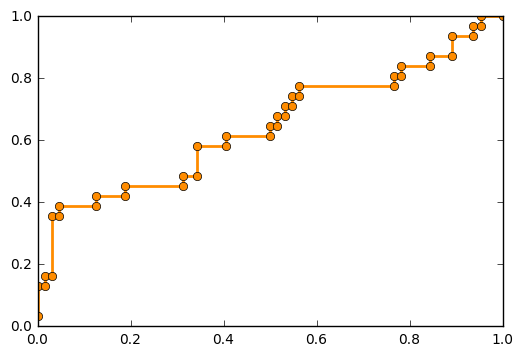

0.644153225806


array([ 0.03901693,  0.04256366,  0.04361529,  0.01990501,  0.04308673,
        0.05498175,  0.02312729,  0.01136371,  0.01886112,  0.01935951,
        0.00705979,  0.00706414,  0.00258689,  0.01873177,  0.0423527 ,
        0.04714882,  0.06697684,  0.02391407,  0.03145806,  0.04046665,
        0.11244653,  0.00849368,  0.00684546,  0.02049863,  0.01878678,
        0.00160166,  0.0095314 ,  0.01086331,  0.00549364,  0.00253639,
        0.00861607,  0.01621796,  0.01023235,  0.0074403 ,  0.03137082,
        0.0084652 ,  0.00586684,  0.00690339,  0.0126455 ,  0.01848738,
        0.00271365,  0.01006926,  0.01521074,  0.00862171,  0.00724821,
        0.01165788,  0.00525071,  0.01224381])

In [116]:
y_prob_test = clf_bdt.clf.predict_proba(features_test)
fpr, tpr, _ = roc_curve(labels_test, y_prob_test[:,1])
from sklearn.metrics import  auc
auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',lw=2, marker='o',label='Random Forest ')
plt.show()
print(auc)

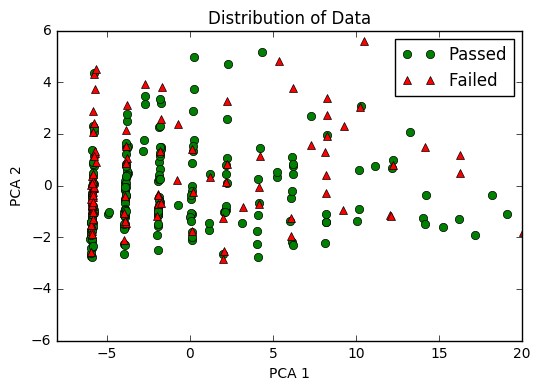

In [153]:
## Decision boundaries
from sklearn.decomposition import PCA
pca_decomp = PCA(n_components=2)
features_train_pca = pca_decomp.fit_transform(features_train)
features_passed = features_train_pca[labels_train.values==0,:]
plt.plot(features_passed[:,0], features_passed[:,1],marker='o',color='g', ls='',label='Passed')
features_failed = features_train_pca[labels_train.values==1,:]
plt.plot(features_failed[:,0], features_failed[:,1],marker='^',color='r', lw='2',ls='',label='Failed')
plt.xlim([-8,20])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Distribution of Data")

plt.legend(loc=0)





In [145]:
# Plotting decision regions
x_min, x_max = features[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()


Index([u'age', u'Medu', u'Fedu', u'traveltime', u'studytime', u'failures',
       u'schoolsup', u'famsup', u'paid', u'activities', u'nursery', u'higher',
       u'internet', u'romantic', u'famrel', u'freetime', u'goout', u'Dalc',
       u'Walc', u'health', u'absences', u'school_GP', u'school_MS', u'sex_F',
       u'sex_M', u'address_R', u'address_U', u'famsize_GT3', u'famsize_LE3',
       u'Pstatus_A', u'Pstatus_T', u'Mjob_at_home', u'Mjob_health',
       u'Mjob_other', u'Mjob_services', u'Mjob_teacher', u'Fjob_at_home',
       u'Fjob_health', u'Fjob_other', u'Fjob_services', u'Fjob_teacher',
       u'reason_course', u'reason_home', u'reason_other', u'reason_reputation',
       u'guardian_father', u'guardian_mother', u'guardian_other'],
      dtype='object')


In [ ]:
## Resample data and run the whole thing again